In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import animation, rc
from IPython.display import HTML

In [23]:
def p_op(x, y):
    dx = x[1] - x[0]  # Assumes linear spacing
    return -1j * const.hbar * np.gradient(y, dx)

def aplus(x, y, m=const.m_e, omega=1):
    coeff = 1 / np.sqrt(2 * const.hbar * m * omega)
    return coeff * (-1j * p_op(x, y) + m * omega * x * y)

def aminus(x, y, m=const.m_e, omega=1):
    coeff = 1 / np.sqrt(2 * const.hbar * m * omega)
    return coeff * (1j * p_op(x, y) + m * omega * x * y)

def psi_0(x, m=const.m_e, omega=1):
    coeff = ((m * omega) / (np.pi * const.hbar))**(1 / 4)
    return coeff * np.exp(-m * omega * x**2 / (2 * const.hbar))

def psi_n(x, n, m=const.m_e, omega=1):
    if n == 0:
        return psi_0(x, m=m, omega=omega)
    else:
        return 1 / np.sqrt(n) * aplus(x, psi_n(x, n - 1, m=m, omega=omega))

# Raising operator
Here we use the raising operator to generate higher energy levels. The function `psi_n` above is an iterative one. If `n==0`, we simply return the lowest level (solved using the simplified differential equation $\hat{a}_-\psi_0=0$). 

<IPython.core.display.Javascript object>


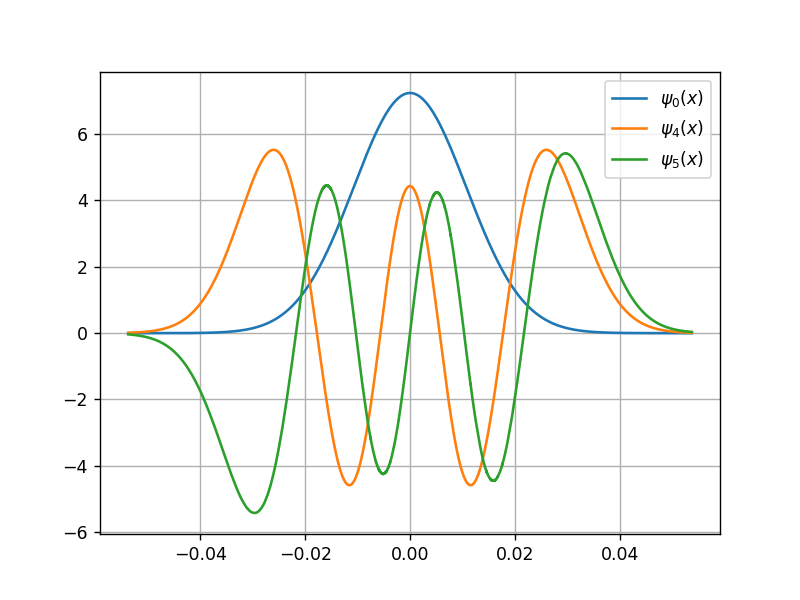

In [57]:
omega = 1
m = const.m_e
x0 = 5 * np.sqrt(const.hbar / (m * omega))
n1 = 0  # Choose two energy states
n2 = 4
n3 = 5
xarr = np.linspace(-x0, x0, 10000)  # Creates an array from 0 to a with 10000 points
psi1 = psi_n(xarr, n1, m=m, omega=omega)
psi2 = psi_n(xarr, n2, m=m, omega=omega)
psi3 = psi_n(xarr, n3, m=m, omega=omega)

trim = np.max([n1, n2, n3])  # weird things happen at the edges, trim them out

fig = plt.figure()
plt.plot(xarr[trim:-trim], np.real(psi1[trim:-trim]), label=f'$\psi_{n1}(x)$')
plt.plot(xarr[trim:-trim], np.real(psi2[trim:-trim]), label=f'$\psi_{n2}(x)$')
plt.plot(xarr[trim:-trim], np.real(psi3[trim:-trim]), label=f'$\psi_{n3}(x)$')
plt.legend()
plt.grid()

See if we can climb back down the latter from n=4 to n=3.

<IPython.core.display.Javascript object>


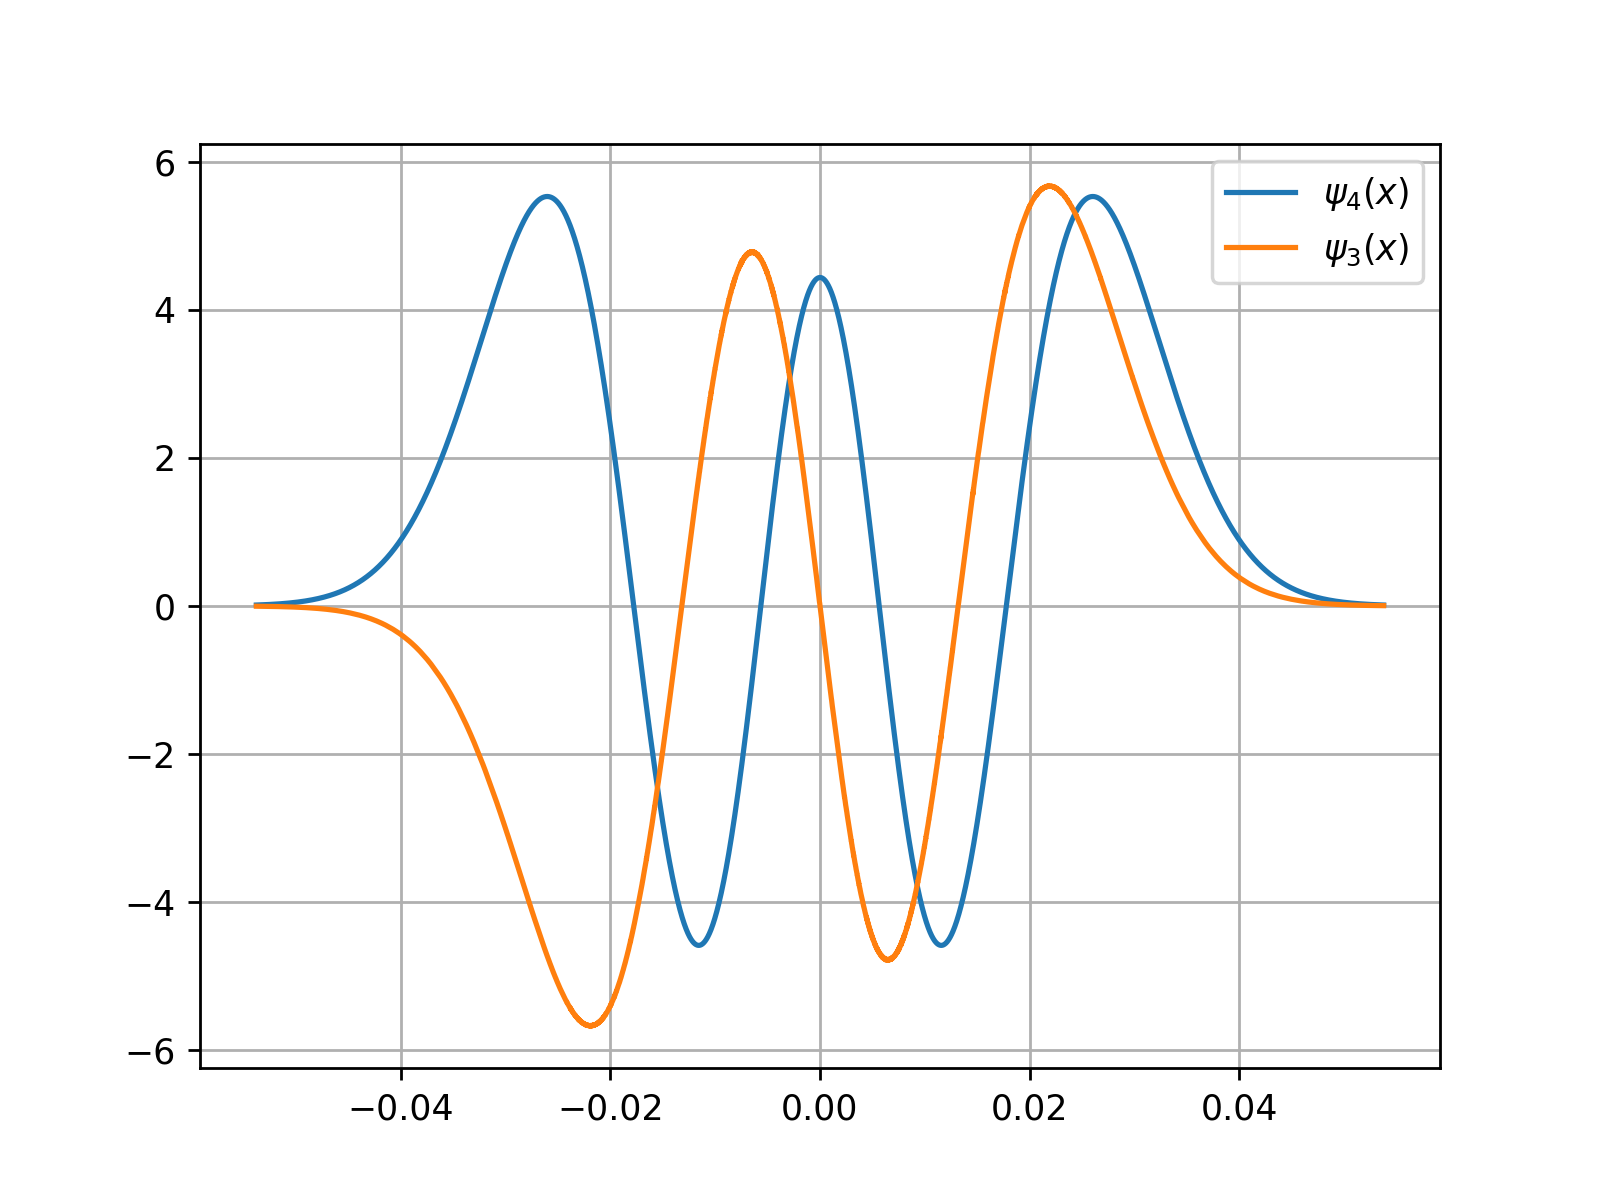

In [50]:
omega = 1
m = const.m_e
x0 = 5 * np.sqrt(const.hbar / (m * omega))
n1 = 4  # Choose two energy states
n2 = 3
xarr = np.linspace(-x0, x0, 10000)  # Creates an array from 0 to a with 10000 points
psi1 = psi_n(xarr, n1, m=m, omega=omega)
psi2 = aminus(xarr, psi1, m=m, omega=omega) / np.sqrt(n1)

trim = np.max([n1, n2]) + 1  # weird things happen at the edges, trim them out

fig = plt.figure()
plt.plot(xarr[trim:-trim], np.real(psi1[trim:-trim]), label=f'$\psi_{n1}(x)$')
plt.plot(xarr[trim:-trim], np.real(psi2[trim:-trim]), label=f'$\psi_{n2}(x)$')
plt.legend()
plt.grid()